<h1><p style="text-align:center">Infrastructure Damage Prediction and Resource Optimization</p></h1>

# Business Problem

After a major earthquake, governments, NGOs, and environmental agencies allocate rescue teams, priortize inspections, distribute medical supplies, and allocate reconstruction funds but the downside of this is that inspecting every building immediately is impossible and resources that is been allocated by the concerned organizations is not sufficient putting into consideration that delays cost lives and also money.

As a data scientist i was tasked to with the below objectives.

# Business Objectives

Develop a predictive model that
1. Identifies buildings at high risk of severe damage
2. Prioritizes emergency response
3. Optimizes allocation of relief resources

# Analytical Objectives

1. Extract, process, and explore data.
2. Build a binary classification predictive model to identify buildings at high risk of severe damage.
3. Use model to conduct business impact analysis.

# Data Overview

The dataset for this project was extracted from a relational database and is based on a Nepal earthquake survey. It contains information about building structures and the corresponding damage grade assigned to each building after the earthquake. The data covers buildings from four districts in Nepal; Kavrepalenchok, Ramaechhap, Sindhupalchok, and Gorkha which are represented in the dataset by district_id values 1, 2, 3, and 4, respectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, auc
import imblearn.over_sampling as OS
import imblearn.under_sampling as US

In [2]:
# read in data into pandas
df = pd.read_csv("../data/nepal_earthquake_damage.csv", index_col="b_id")
df.head()

,district_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
b_id,,,,,,,,,,,,,,,,,,
56,1,56,2,2,40,322,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 2
63,1,63,2,2,1,437,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Not damaged,"Stone, mud mortar",Grade 1
97,1,97,2,2,22,420,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 2
99,1,99,2,2,50,242,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 4
115,1,115,2,2,12,308,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 3


In [3]:
df.tail()

,district_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
b_id,,,,,,,,,,,,,,,,,,
234774,4,234774,2,0,45,336,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Rubble Clear-New building built,"Stone, mud mortar",Grade 5
234808,4,234808,2,0,70,255,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble Clear-New building built,"Stone, mud mortar",Grade 5
234821,4,234821,2,0,11,552,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Rubble Clear-New building built,"Stone, mud mortar",Grade 5
234828,4,234828,2,0,35,598,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble Clear-New building built,"Stone, mud mortar",Grade 5
234835,4,234835,2,0,12,840,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,"Stone, mud mortar",Grade 5


In [4]:
# inspect dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234835 entries, 56 to 234835
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   district_id             234835 non-null  int64 
 1   building_id             234835 non-null  int64 
 2   count_floors_pre_eq     234835 non-null  int64 
 3   count_floors_post_eq    234835 non-null  int64 
 4   age_building            234835 non-null  int64 
 5   plinth_area_sq_ft       234835 non-null  int64 
 6   height_ft_pre_eq        234835 non-null  int64 
 7   height_ft_post_eq       234835 non-null  int64 
 8   land_surface_condition  234835 non-null  object
 9   foundation_type         234835 non-null  object
 10  roof_type               234835 non-null  object
 11  ground_floor_type       234835 non-null  object
 12  other_floor_type        234835 non-null  object
 13  position                234834 non-null  object
 14  plan_configuration      234834 non-null 

In [5]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,district_id,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
count,234835.000000,234835.00000,234835.000000,234835.000000,234835.000000,234835.000000,234835.000000,234835.000000
mean,2.778930,117418.00000,2.088603,1.534456,26.950987,402.474623,16.085566,11.875385
std,1.037302,67791.16957,0.609112,1.031819,71.030354,195.838405,5.181656,8.281453
min,1.000000,1.00000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000
25%,2.000000,58709.50000,2.000000,1.000000,10.000000,287.000000,13.000000,6.000000
50%,3.000000,117418.00000,2.000000,2.000000,18.000000,371.000000,15.000000,14.000000
75%,4.000000,176126.50000,2.000000,2.000000,30.000000,475.000000,18.000000,18.000000
max,4.000000,234835.00000,9.000000,9.000000,999.000000,4995.000000,99.000000,99.000000


In [7]:
df.describe(include="object")

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,superstructure,damage_grade
count,234835,234835,234835,234835,234835,234834,234834,234835,234835,234824
unique,3,5,3,5,4,4,10,8,11,5
top,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,"Stone, mud mortar",Grade 4
freq,192510,214958,163976,200634,164167,193760,226806,85037,196841,69795


In [8]:
# Check for  misspelling
for col in df.select_dtypes(include="object").columns:
    print(df[col].value_counts())
    print("")

land_surface_condition
Flat              192510
Moderate slope     34095
Steep slope         8230
Name: count, dtype: int64

foundation_type
Mud mortar-Stone/Brick    214958
RC                          8591
Cement-Stone/Brick          7895
Bamboo/Timber               2432
Other                        959
Name: count, dtype: int64

roof_type
Bamboo/Timber-Light roof    163976
Bamboo/Timber-Heavy roof     59579
RCC/RB/RBC                   11280
Name: count, dtype: int64

ground_floor_type
Mud            200634
Brick/Stone     18600
RC              13987
Timber           1387
Other             227
Name: count, dtype: int64

other_floor_type
TImber/Bamboo-Mud    164167
Timber-Planck         33013
Not applicable        28280
RCC/RB/RBC             9375
Name: count, dtype: int64

position
Not attached       193760
Attached-1 side     33891
Attached-2 side      6911
Attached-3 side       272
Name: count, dtype: int64

plan_configuration
Rectangular                        226806
Square       

# Data Cleaning

In [9]:
df.isnull().sum()

district_id                0
building_id                0
count_floors_pre_eq        0
count_floors_post_eq       0
age_building               0
plinth_area_sq_ft          0
height_ft_pre_eq           0
height_ft_post_eq          0
land_surface_condition     0
foundation_type            0
roof_type                  0
ground_floor_type          0
other_floor_type           0
position                   1
plan_configuration         1
condition_post_eq          0
superstructure             0
damage_grade              11
dtype: int64

In [10]:
# Drop rows that has no damage_grade value
df.dropna(subset="damage_grade", axis=0, inplace=True)

In [11]:
df.isnull().sum()

district_id               0
building_id               0
count_floors_pre_eq       0
count_floors_post_eq      0
age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
height_ft_post_eq         0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
condition_post_eq         0
superstructure            0
damage_grade              0
dtype: int64

In [12]:
# create target variable that groups grade 4, and 5 as severe damage, and grade less than 4 as not severe damage
df["severe_damage"] = pd.to_numeric(df["damage_grade"].str.split(expand=True)[1]).apply(lambda x: "Severe damage" if x > 3 else "Not severe damage")

In [13]:
# Drop columns
df.drop(["building_id", "count_floors_post_eq", "height_ft_post_eq", "condition_post_eq", "damage_grade"], axis=1, inplace=True)
df.head()

,district_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
b_id,,,,,,,,,,,,,,
56,1,2,40,322,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
63,1,2,1,437,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
97,1,2,22,420,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
99,1,2,50,242,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"Stone, mud mortar",Severe damage
115,1,2,12,308,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,"Stone, mud mortar",Not severe damage


In [14]:
df.index.name = None

In [15]:
df.sort_index(inplace=True)
df.head()

,district_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
1,1,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
2,1,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Severe damage
3,1,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
4,1,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
5,1,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage


In [16]:
# map district name to its corresponding id
district_map = {
    1:"Kavrepalenchok",
    2:"Ramechhap",
    3:"Sindhupalchowk",
    4:"Gorkha"
}

df["district_id"] = df["district_id"].map(district_map)

In [17]:
# Rename column 
df.rename(columns={"district_id":"district"}, inplace=True)

In [18]:
df.head()

,district,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
1,Kavrepalenchok,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
2,Kavrepalenchok,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Severe damage
3,Kavrepalenchok,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
4,Kavrepalenchok,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage
5,Kavrepalenchok,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,"Stone, mud mortar",Not severe damage


# Exploratory Data Analysis

### Explore Target Variable

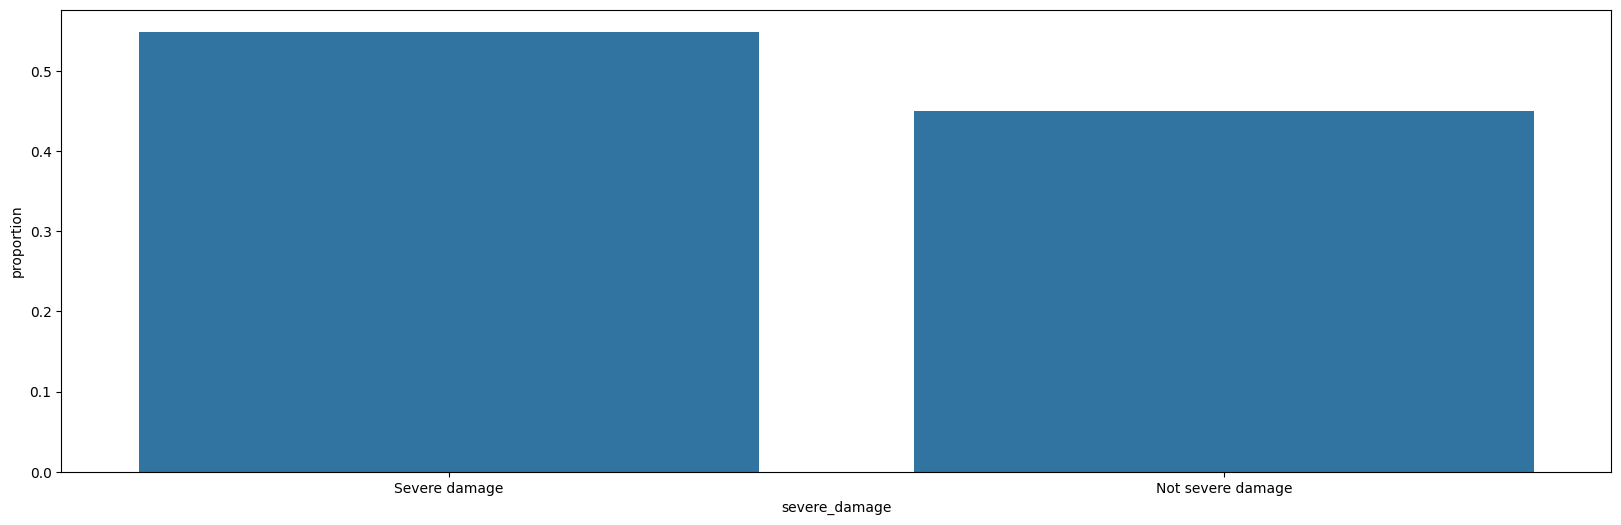

In [19]:
plt.figure(figsize=(20, 6))
sns.barplot(df["severe_damage"].value_counts(normalize=True));

### Explore Features

#### Numeric

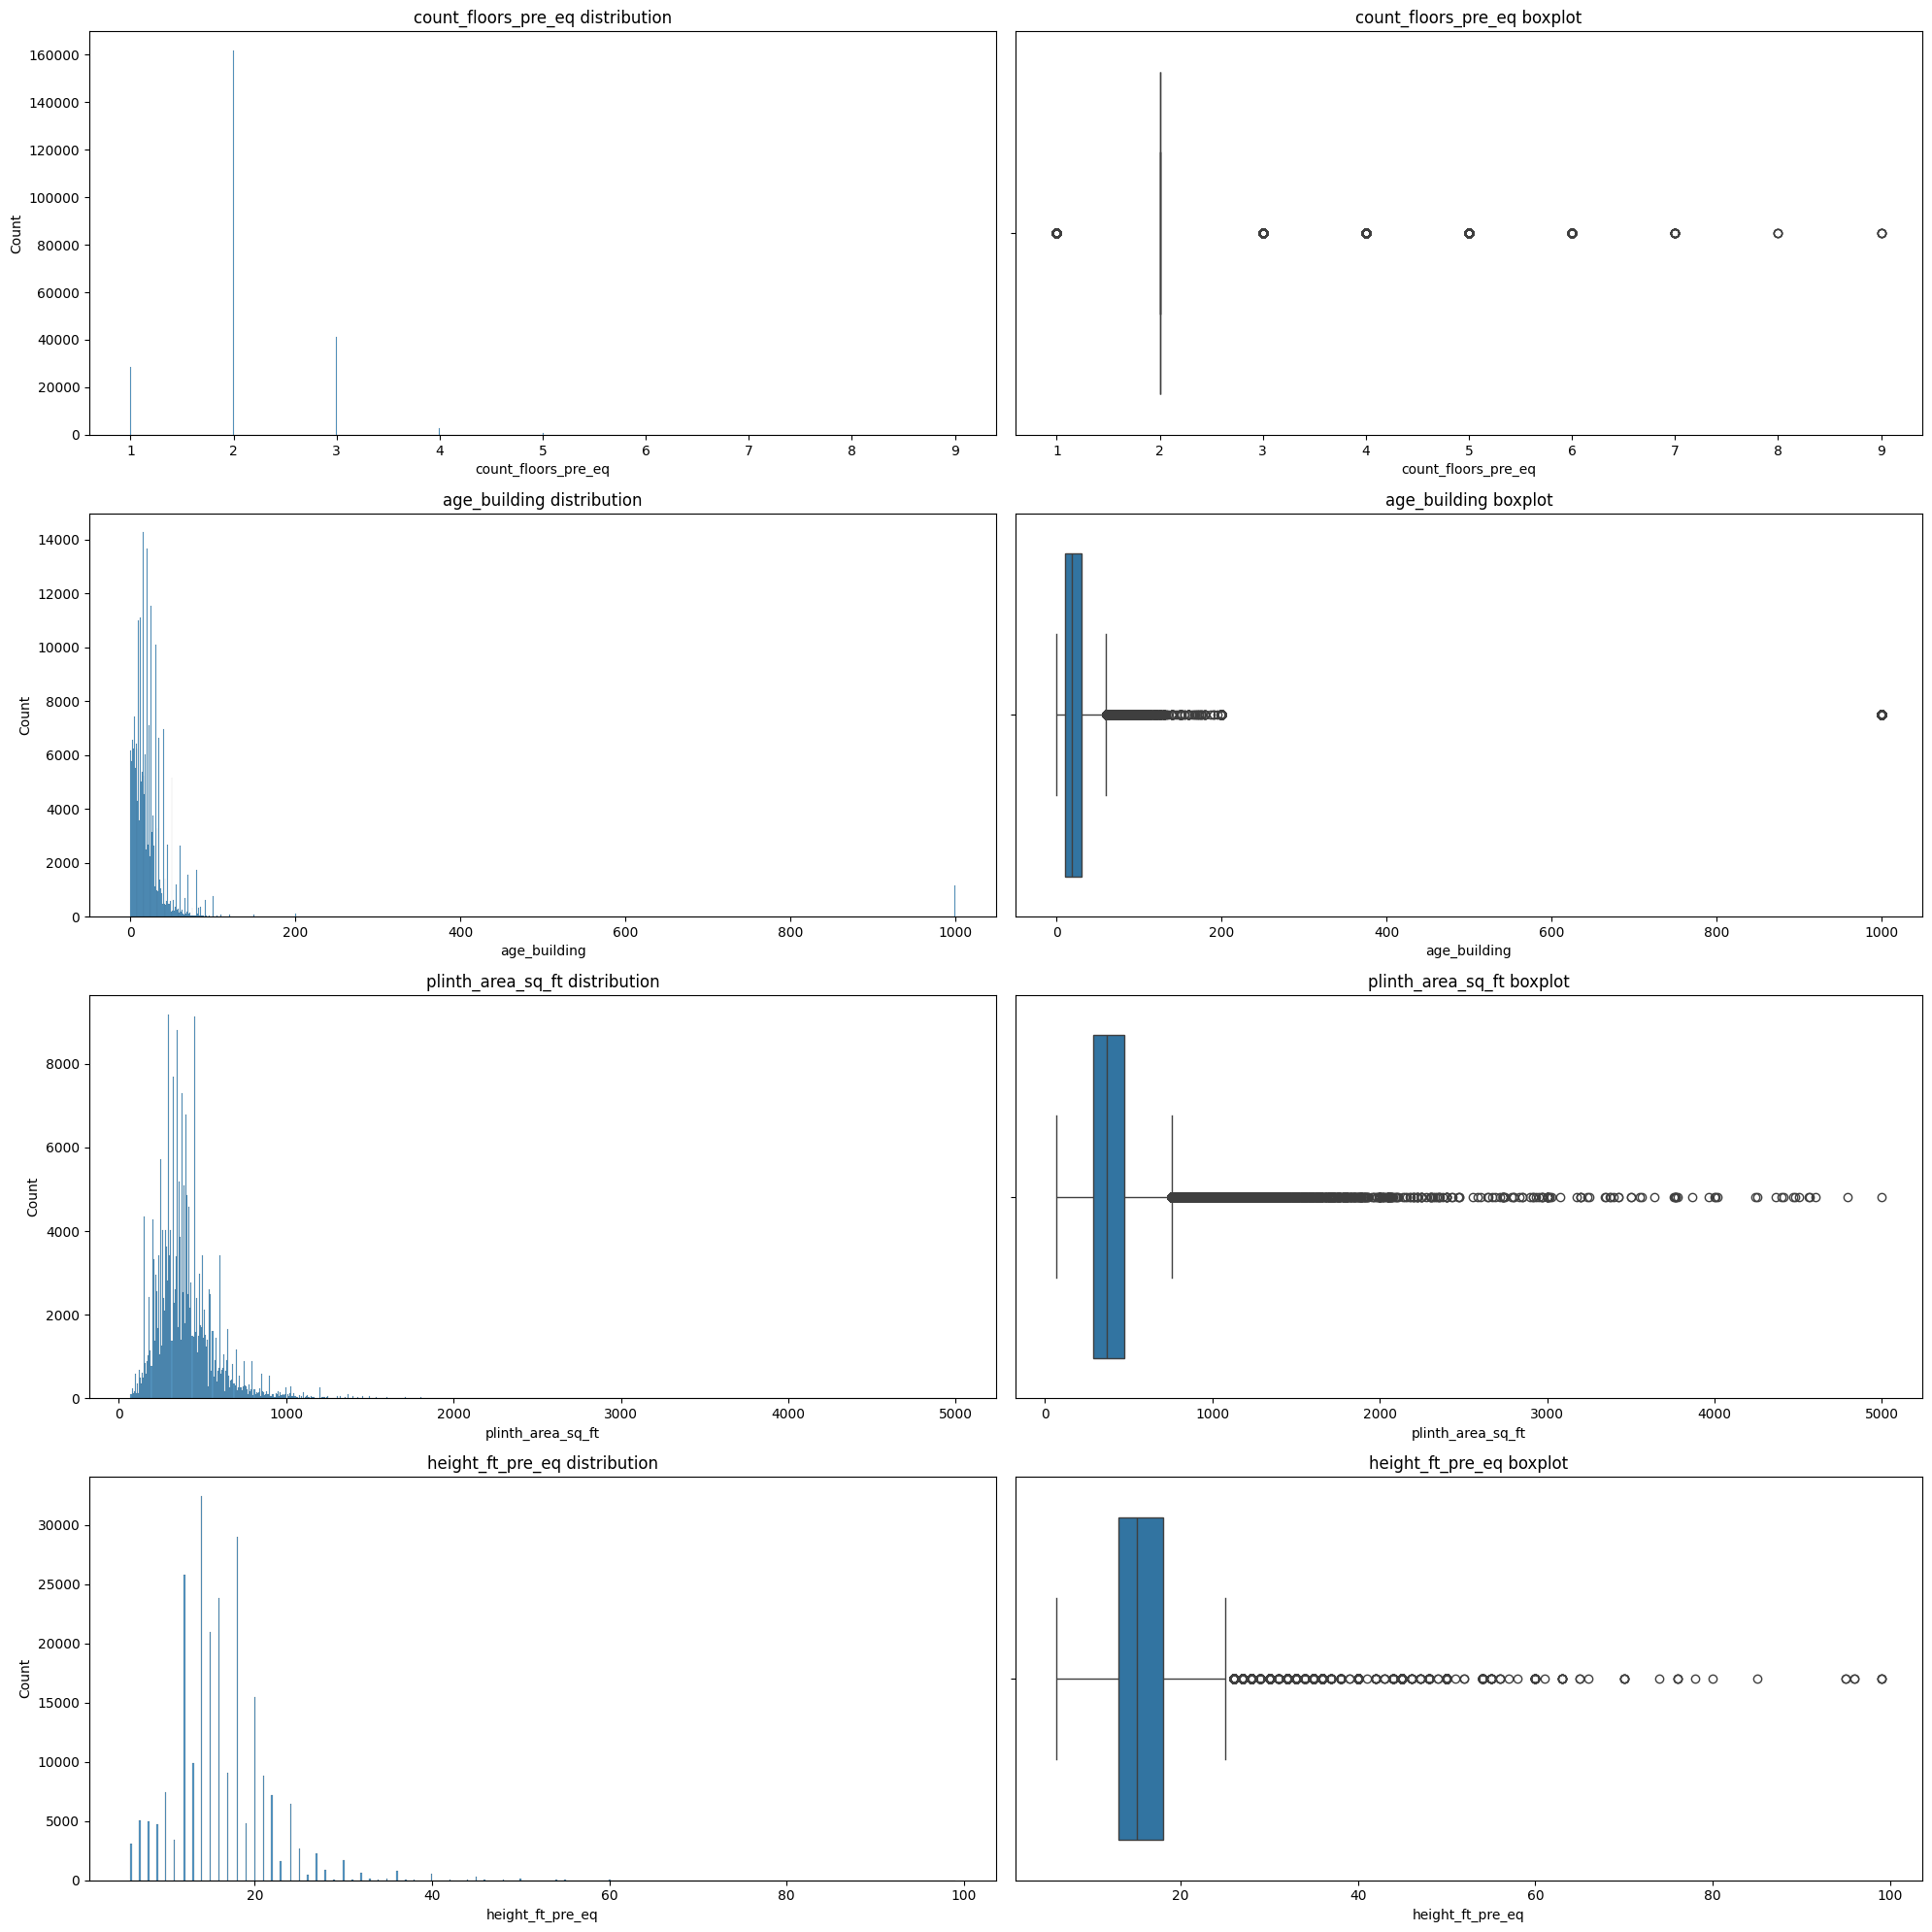

In [20]:
num_cols = df.select_dtypes(include="number").columns

n_row = len(num_cols)
n_col = 2

fig, axs = plt.subplots(n_row, n_col, figsize=(20, 5 * n_row))

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axs[i, 0])
    axs[i, 0].set_title(f"{col} distribution")

    sns.boxplot(data=df, x=col, ax=axs[i, 1])
    axs[i, 1].set_title(f"{col} boxplot")

plt.tight_layout()

#### Categorical

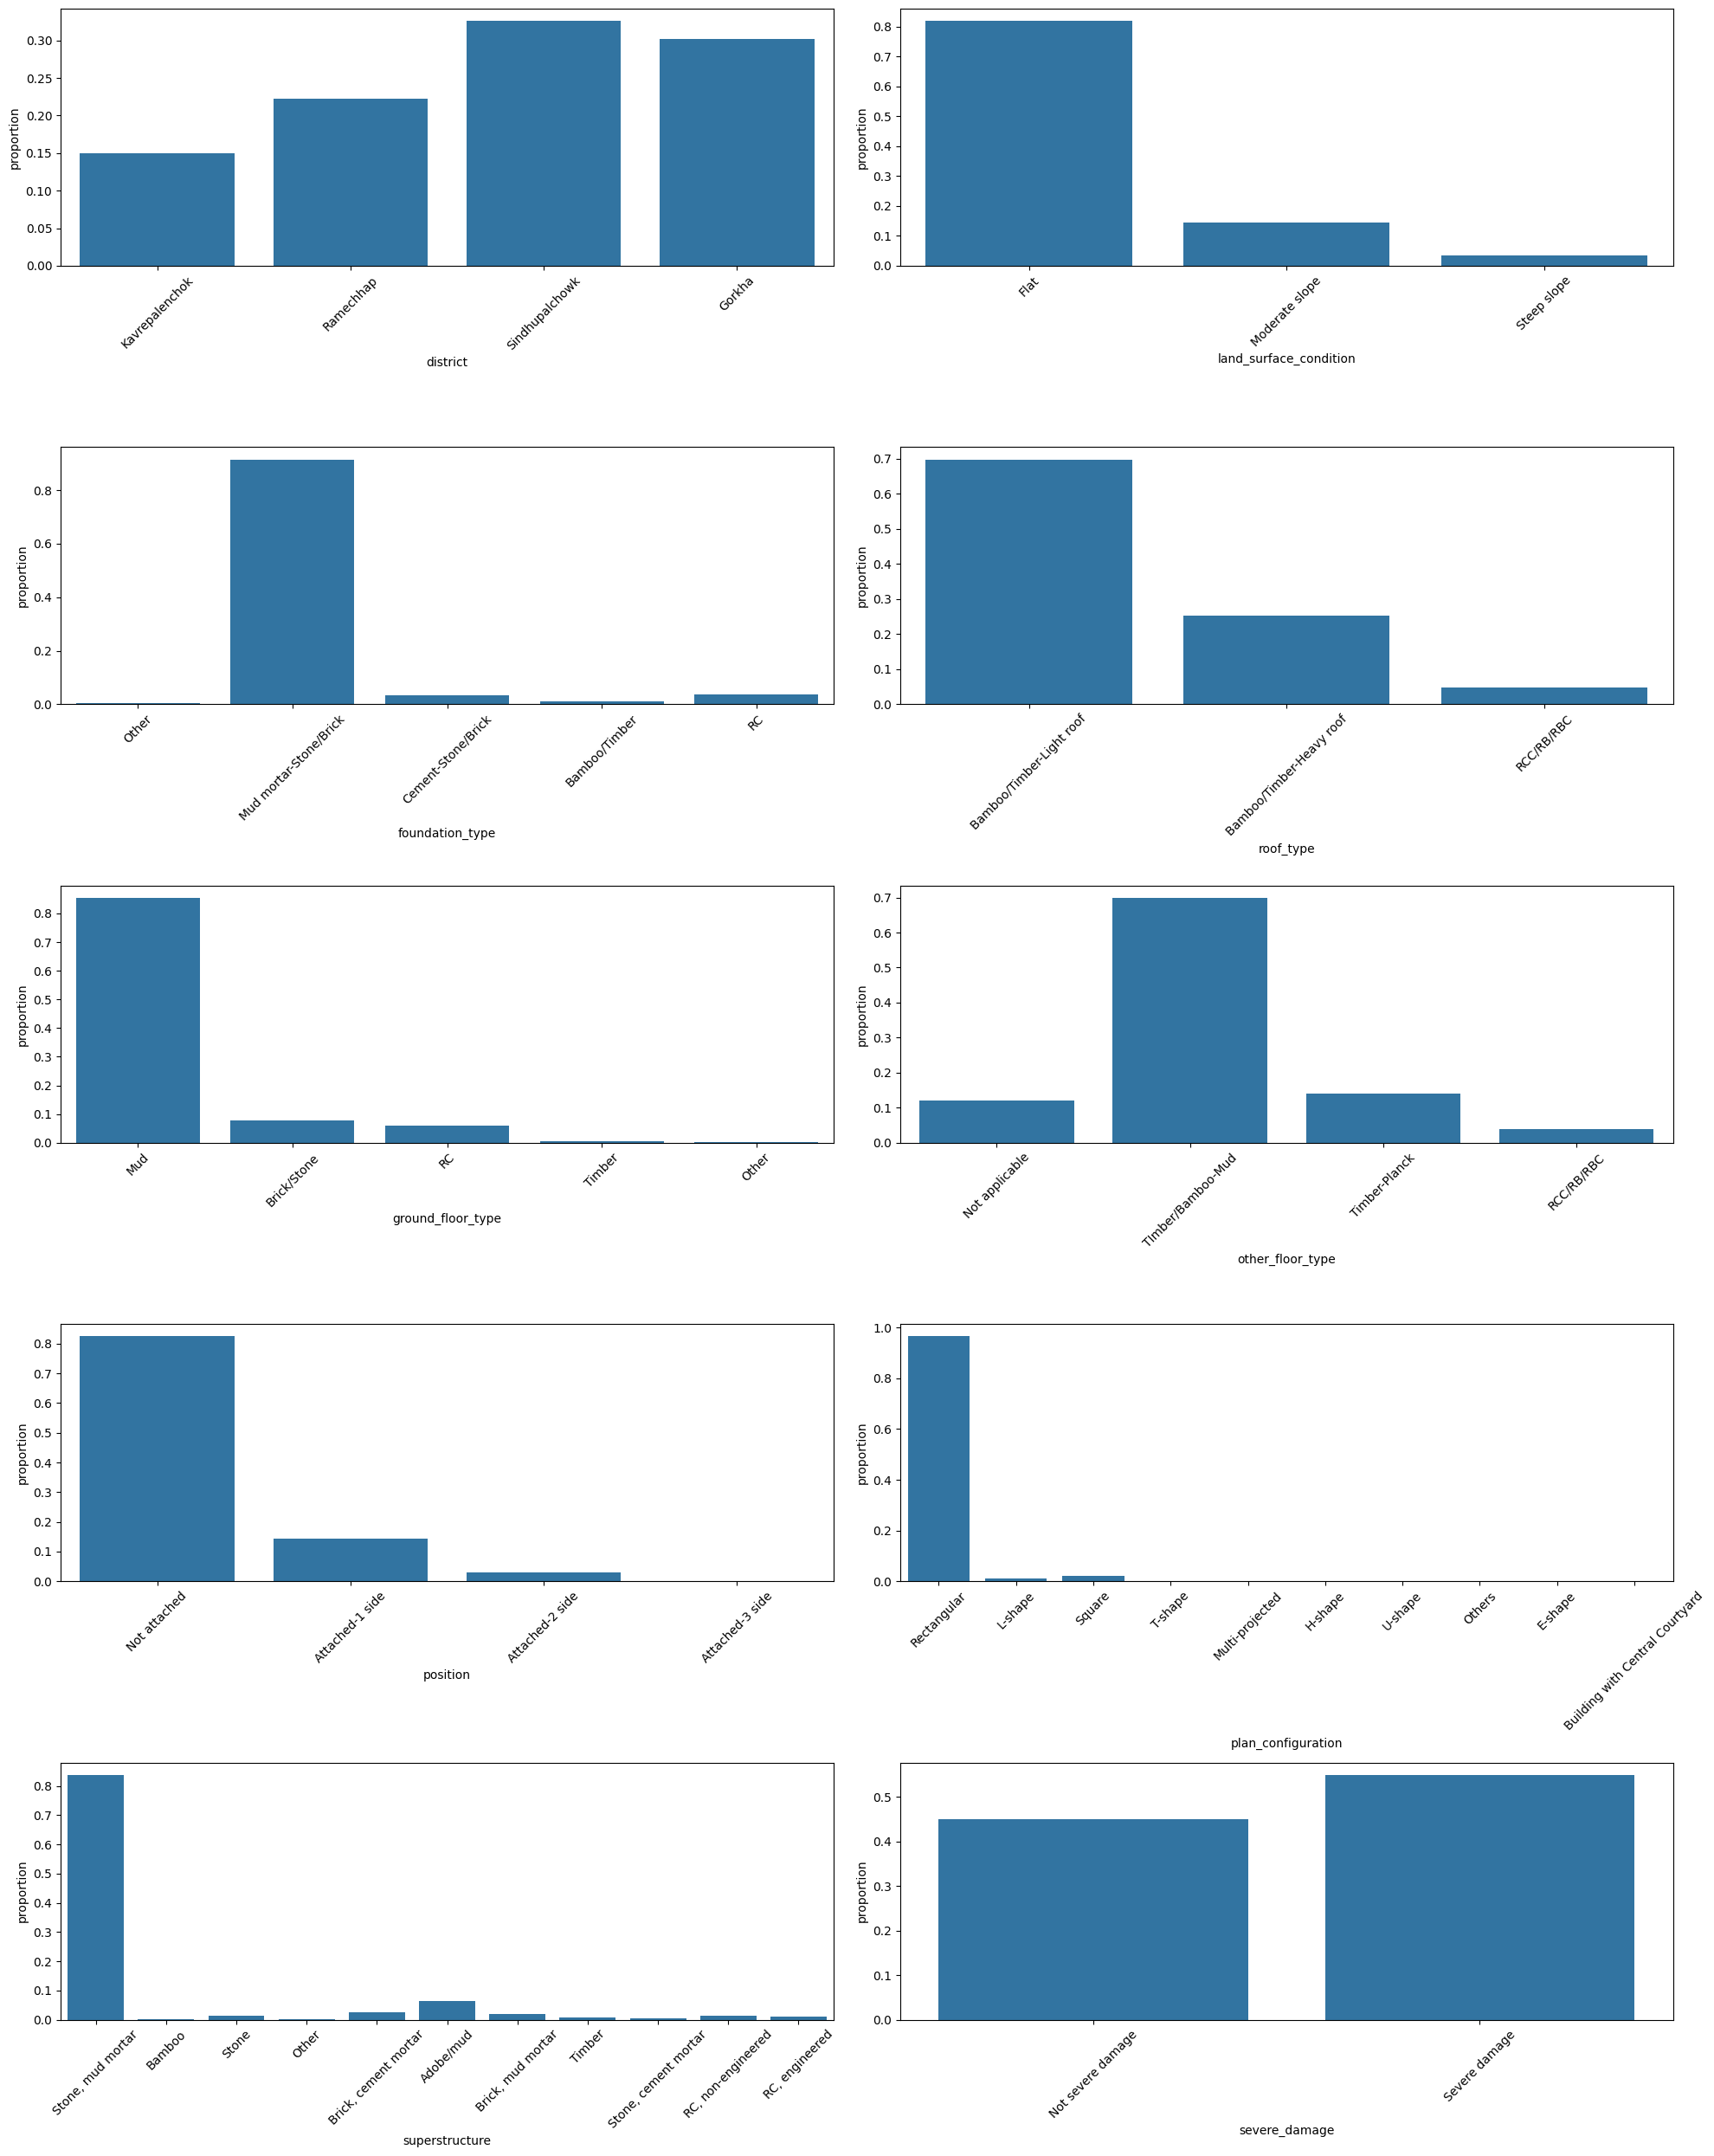

In [21]:
cat_cols = df.select_dtypes(include="object").columns

n_row = len(cat_cols) // 2
n_col = 2

fig, axs = plt.subplots(n_row, n_col, figsize=(20, 5 * n_row))
axs = axs.flatten()

for axs, col in zip(axs, cat_cols):
    sns.countplot(data=df, x=col, stat="proportion", ax=axs)
    axs.tick_params(axis="x",rotation=45)

plt.tight_layout()